In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df=pd.read_csv('data/train.csv')
test_df=pd.read_csv('data/test.csv')

In [60]:
# train_df.sample(5)
# test_df.sample(5)

In [238]:
train_df.info()
# test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196539 entries, 0 to 196538
Data columns (total 19 columns):
Time            196539 non-null int64
Neighborhood    196539 non-null int64
RentRoom        195538 non-null float64
Height          196539 non-null int64
TolHeight       196539 non-null float64
RoomArea        196539 non-null float64
RoomDir         196539 non-null object
RentStatus      20138 non-null float64
Bedroom         196539 non-null int64
Livingroom      196539 non-null int64
Bathroom        196539 non-null int64
RentType        24230 non-null float64
Region          196508 non-null float64
BusLoc          196508 non-null float64
SubwayLine      91778 non-null float64
SubwaySta       91778 non-null float64
SubwayDis       91778 non-null float64
RemodCond       18492 non-null float64
Rental          196539 non-null float64
dtypes: float64(12), int64(6), object(1)
memory usage: 28.5+ MB


带缺失值的列有：
**RentRoom、RentStatus、RentType、Region、BusLoc、SubwayLine、SubwaySta、SubwayDis、RemodCond**

In [62]:
train_df.describe()

,Time,Neighborhood,RentRoom,Height,TolHeight,RoomArea,RentStatus,Bedroom,Livingroom,Bathroom,RentType,Region,BusLoc,SubwayLine,SubwaySta,SubwayDis,RemodCond,Rental
count,196539.000000,196539.000000,195538.000000,196539.000000,196539.000000,196539.000000,20138.000000,196539.000000,196539.000000,196539.000000,24230.000000,196508.000000,196508.000000,91778.000000,91778.000000,91778.000000,18492.000000,196539.000000
mean,2.115229,3224.116562,0.124151,0.955449,0.408711,0.013139,2.725196,2.236635,1.299625,1.223818,0.900289,7.905139,67.945982,3.284850,57.493735,0.551202,3.589228,7.949313
std,0.786980,2023.073726,0.133299,0.851511,0.183100,0.008104,0.667763,0.896961,0.613169,0.487234,0.299621,4.025696,43.522394,1.477147,35.191414,0.247268,1.996912,6.310609
min,1.000000,0.000000,0.007812,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.001667,1.000000,0.000000
25%,1.000000,1388.000000,0.039062,0.000000,0.290909,0.009268,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,33.000000,2.000000,23.000000,0.356667,2.000000,4.923599
50%,2.000000,3086.000000,0.082031,1.000000,0.418182,0.012910,3.000000,2.000000,1.000000,1.000000,1.000000,9.000000,61.000000,4.000000,59.000000,0.554167,2.000000,6.621392
75%,3.000000,5199.000000,0.160156,2.000000,0.563636,0.014896,3.000000,3.000000,2.000000,1.000000,1.000000,11.000000,103.000000,5.000000,87.000000,0.745833,6.000000,8.998302
max,3.000000,6627.000000,1.000000,2.000000,1.000000,1.000000,3.000000,11.000000,8.000000,8.000000,1.000000,14.000000,152.000000,5.000000,119.000000,1.000000,6.000000,100.000000


## 小区

训练集独有小区数：2085
测试集独有小区：342


<Figure size 432x288 with 0 Axes>

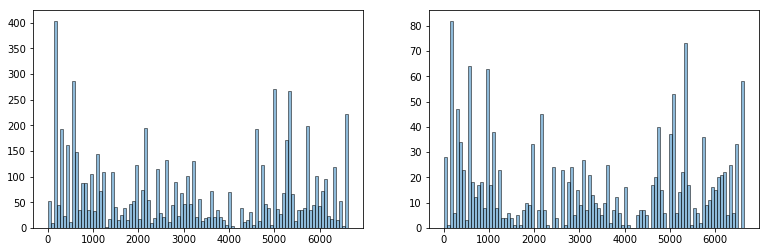

In [114]:
# len(train_df.loc[:,'Neighborhood'].unique())        # 5547个小区，多类别特征，考虑mean-encoding或target-encoding
# len(test_df.loc[:,'Neighborhood'].unique())        # 3804个小区，多类别特征，考虑mean-encoding或target-encoding
train_nei=set(train_df.loc[:,'Neighborhood'].unique())
test_nei=set(test_df.loc[:,'Neighborhood'].unique())
train_unique=train_nei-(train_nei&test_nei)
test_unique=test_nei-(train_nei&test_nei)

print('训练集独有小区数：{}'.format(len(train_unique)))
print('测试集独有小区：{}'.format(len(test_unique)))

plt.clf()
fig,axs=plt.subplots(1,2,figsize=(13,4))
axs[0].hist(train_df.dropna().loc[:,'Neighborhood'],bins=100,edgecolor='black',alpha=0.5)
axs[1].hist(test_df.dropna().loc[:,'Neighborhood'],bins=100,edgecolor='black',alpha=0.5)
plt.show()

## 楼层

0    75825
2    67069
1    53645
Name: Height, dtype: int64


<Figure size 432x288 with 0 Axes>

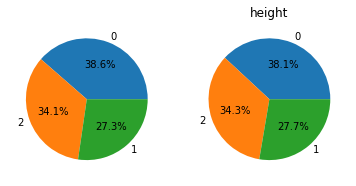

In [116]:
print(train_df.loc[:,'Height'].value_counts())
plt.clf()
fig,axs=plt.subplots(1,2)
axs[0].pie(train_df.loc[:,'Height'].value_counts().values,
        labels=train_df.loc[:,'Height'].value_counts().index,
        autopct='%1.1f%%')
axs[1].pie(test_df.loc[:,'Height'].value_counts().values,
        labels=test_df.loc[:,'Height'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

## 朝向

训练集独有朝向：{'WS W EN', 'E W EN', 'ES WS W', 'E WN N', 'W WN N', 'N W', 'S N EN', 'E ES N', 'ES S WS W', 'ES W N', 'E S WS', 'E S WN N'}
测试集独有朝向：{'WN N EN', 'S ES'}


<Figure size 432x288 with 0 Axes>

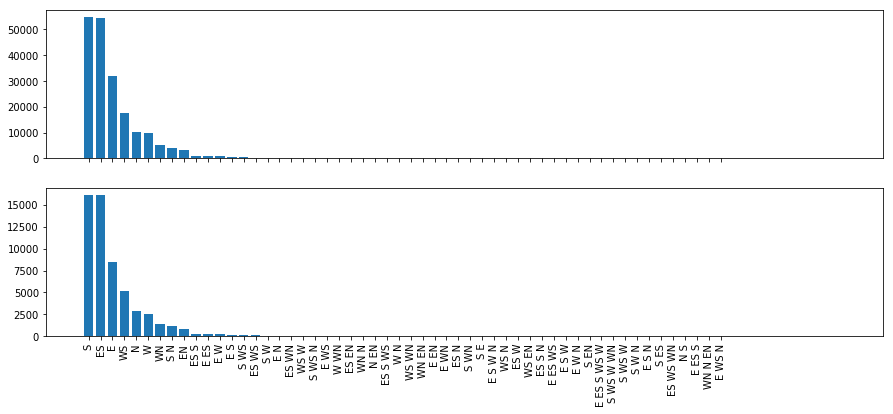

In [130]:
# print(len(train_df.loc[:,'RoomDir'].value_counts()))        # 64种不同字符串
# print(len(test_df.loc[:,'RoomDir'].value_counts()))        # 54种不同字符串
train_nei=set(train_df.loc[:,'RoomDir'].unique())
test_nei=set(test_df.loc[:,'RoomDir'].unique())
train_unique=train_nei-(train_nei&test_nei)
test_unique=test_nei-(train_nei&test_nei)

print('训练集独有朝向：{}'.format(train_unique))
print('测试集独有朝向：{}'.format(test_unique))


plt.clf()
fig,axs=plt.subplots(2,1,figsize=(15,6),sharex=True)
axs[0].bar(x=train_df.loc[:,'RoomDir'].value_counts().index,height=train_df.loc[:,'RoomDir'].value_counts().values)
axs[1].bar(x=test_df.loc[:,'RoomDir'].value_counts().index,height=test_df.loc[:,'RoomDir'].value_counts().values)
plt.xticks(rotation='90')
plt.show()

<Figure size 432x288 with 0 Axes>

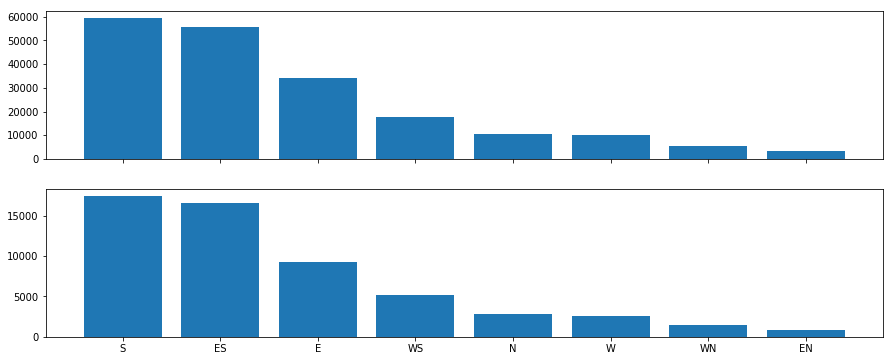

In [232]:
def ex_dir(direction):
    try:
        direction=direction.split(' ')[0]
    except Exception as e:
        pass
    return direction

tmp_train_df=train_df
tmp_test_df=test_df
tmp_train_df.loc[:,'RoomDir']=train_df.loc[:,'RoomDir'].apply(ex_dir)
tmp_test_df.loc[:,'RoomDir']=test_df.loc[:,'RoomDir'].apply(ex_dir)

plt.clf()
fig,axs=plt.subplots(2,1,figsize=(15,6),sharex=True)
axs[0].bar(x=tmp_train_df.loc[:,'RoomDir'].value_counts().index,height=tmp_train_df.loc[:,'RoomDir'].value_counts().values)
axs[1].bar(x=tmp_test_df.loc[:,'RoomDir'].value_counts().index,height=tmp_test_df.loc[:,'RoomDir'].value_counts().values)
plt.show()

## 出租状态

3.0    17087
1.0     2483
2.0      568
Name: RentStatus, dtype: int64


<Figure size 432x288 with 0 Axes>

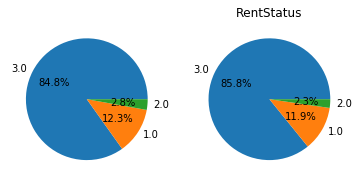

In [131]:
print(train_df.loc[:,'RentStatus'].value_counts())
plt.clf()
fig,axs=plt.subplots(1,2)
axs[0].pie(train_df.loc[:,'RentStatus'].value_counts().values,
        labels=train_df.loc[:,'RentStatus'].value_counts().index,
        autopct='%1.1f%%')
axs[1].pie(test_df.loc[:,'RentStatus'].value_counts().values,
        labels=test_df.loc[:,'RentStatus'].value_counts().index,
        autopct='%1.1f%%')
plt.title('RentStatus')
plt.show()

## 卧室

训练集独有卧室数：{11}
测试集独有卧室数：set()


<Figure size 432x288 with 0 Axes>

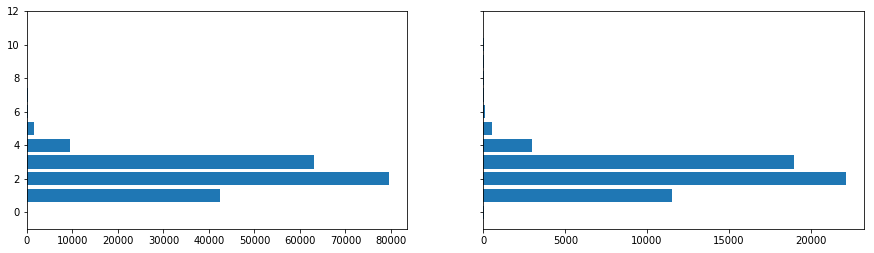

In [151]:
# print(len(train_df.loc[:,'Bedroom'].value_counts()))        # 12
# print(len(test_df.loc[:,'Bedroom'].value_counts()))        # 11
train_nei=set(train_df.loc[:,'Bedroom'].unique())
test_nei=set(test_df.loc[:,'Bedroom'].unique())
train_unique=train_nei-(train_nei&test_nei)
test_unique=test_nei-(train_nei&test_nei)
print('训练集独有卧室数：{}'.format(train_unique))
print('测试集独有卧室数：{}'.format(test_unique))

plt.clf()
fig,axs=plt.subplots(1,2,sharey=True,figsize=(15,4))
axs[0].barh(y=train_df.loc[:,'Bedroom'].value_counts().index,width=train_df.loc[:,'Bedroom'].value_counts().values)
axs[1].barh(y=test_df.loc[:,'Bedroom'].value_counts().index,width=test_df.loc[:,'Bedroom'].value_counts().values)
plt.show()

## 起居室

训练集独有起居室数：set()
测试集独有起居室数：{7}


<Figure size 432x288 with 0 Axes>

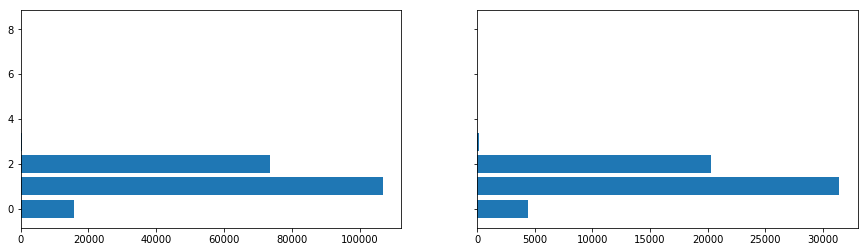

In [153]:
train_nei=set(train_df.loc[:,'Livingroom'].unique())
test_nei=set(test_df.loc[:,'Livingroom'].unique())
train_unique=train_nei-(train_nei&test_nei)
test_unique=test_nei-(train_nei&test_nei)
print('训练集独有起居室数：{}'.format(train_unique))
print('测试集独有起居室数：{}'.format(test_unique))

plt.clf()
fig,axs=plt.subplots(1,2,sharey=True,figsize=(15,4))
axs[0].barh(y=train_df.loc[:,'Livingroom'].value_counts().index,width=train_df.loc[:,'Livingroom'].value_counts().values)
axs[1].barh(y=test_df.loc[:,'Livingroom'].value_counts().index,width=test_df.loc[:,'Livingroom'].value_counts().values)
plt.show()

## 卫浴

训练集独有卫浴数：{8}
测试集独有卫浴数：set()


<Figure size 432x288 with 0 Axes>

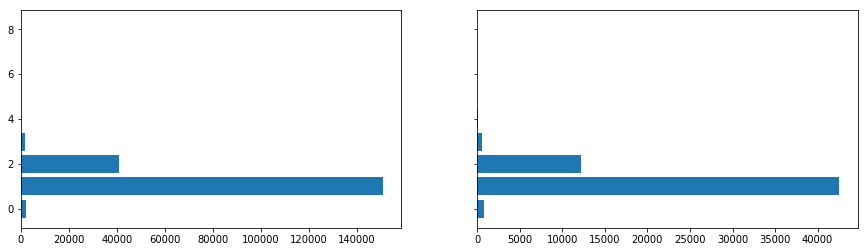

In [155]:
train_nei=set(train_df.loc[:,'Bathroom'].unique())
test_nei=set(test_df.loc[:,'Bathroom'].unique())
train_unique=train_nei-(train_nei&test_nei)
test_unique=test_nei-(train_nei&test_nei)
print('训练集独有卫浴数：{}'.format(train_unique))
print('测试集独有卫浴数：{}'.format(test_unique))

plt.clf()
fig,axs=plt.subplots(1,2,sharey=True,figsize=(15,4))
axs[0].barh(y=train_df.loc[:,'Bathroom'].value_counts().index,width=train_df.loc[:,'Bathroom'].value_counts().values)
axs[1].barh(y=test_df.loc[:,'Bathroom'].value_counts().index,width=test_df.loc[:,'Bathroom'].value_counts().values)
plt.show()

## 出租类型

1.0    21814
0.0     2416
Name: RentType, dtype: int64


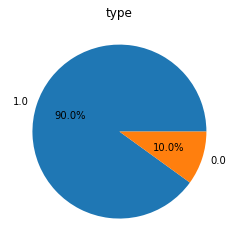

In [72]:
print(train_df.loc[:,'RentType'].value_counts())
plt.clf()
plt.pie(train_df.loc[:,'RentType'].value_counts().values,
        labels=train_df.loc[:,'RentType'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

## 所在行政区

训练集独有行政区：{nan}
测试集独有行政区：{nan}


<Figure size 432x288 with 0 Axes>

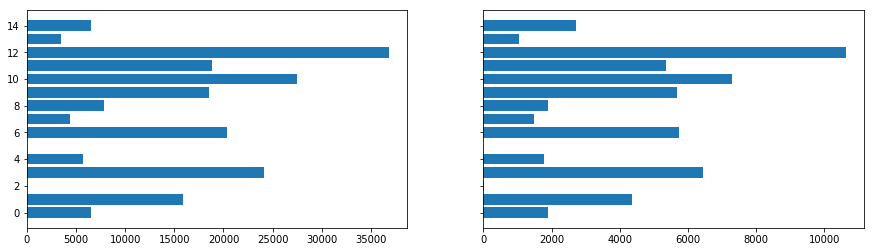

In [167]:
train_nei=set(train_df.loc[:,'Region'].unique())
test_nei=set(test_df.loc[:,'Region'].unique())
train_unique=train_nei-(train_nei&test_nei)
test_unique=test_nei-(train_nei&test_nei)
print('训练集独有行政区：{}'.format(train_unique))
print('测试集独有行政区：{}'.format(test_unique))

plt.clf()
fig,axs=plt.subplots(1,2,sharey=True,figsize=(15,4))
axs[0].barh(y=train_df.loc[:,'Region'].value_counts().index,width=train_df.loc[:,'Region'].value_counts().values)
axs[1].barh(y=test_df.loc[:,'Region'].value_counts().index,width=test_df.loc[:,'Region'].value_counts().values)
plt.show()

## 商圈

训练集独有商圈：{nan, 25.0, 21.0, 46.0}
测试集独有商圈：{nan}


<Figure size 432x288 with 0 Axes>

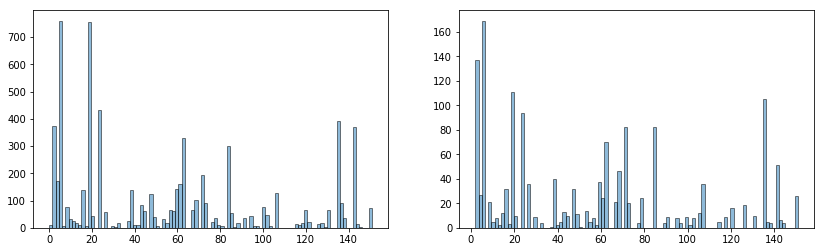

In [170]:
train_nei=set(train_df.loc[:,'BusLoc'].unique())
test_nei=set(test_df.loc[:,'BusLoc'].unique())
train_unique=train_nei-(train_nei&test_nei)
test_unique=test_nei-(train_nei&test_nei)
print('训练集独有商圈：{}'.format(train_unique))
print('测试集独有商圈：{}'.format(test_unique))

plt.clf()
fig,axs=plt.subplots(1,2,figsize=(14,4))
axs[0].hist(train_df.dropna().loc[:,'BusLoc'],bins=100,edgecolor='black',alpha=0.5)
axs[1].hist(test_df.dropna().loc[:,'BusLoc'],bins=100,edgecolor='black',alpha=0.5)
plt.show()

**注意：**6627小区在训练集中属于86号商圈，但在测试集中却变成了136号商圈，为了保持一致性，是否需要将测试集中该小区的商圈修正。测试还有没有变化的：

In [ ]:
# train_df.loc[:,[]]

## 地铁线

5.0    26577
4.0    20002
1.0    17189
3.0    15375
2.0    12635
Name: SubwayLine, dtype: int64


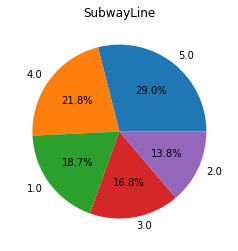

In [16]:
print(train_df.loc[:,'SubwayLine'].value_counts())
plt.clf()
plt.pie(train_df.loc[:,'SubwayLine'].value_counts().values,
        labels=train_df.loc[:,'SubwayLine'].value_counts().index,
        autopct='%1.1f%%')
plt.title('SubwayLine')
plt.show()

## 地铁站

训练集独有地铁站：{nan, 81.0, 110.0, 47.0}
测试集独有地铁站：{nan}


<Figure size 432x288 with 0 Axes>

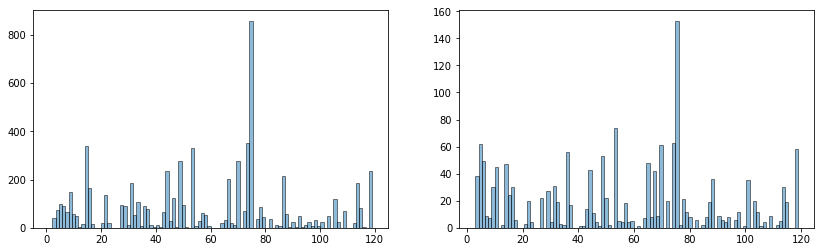

In [233]:
train_nei=set(train_df.loc[:,'SubwaySta'].unique())
test_nei=set(test_df.loc[:,'SubwaySta'].unique())
train_unique=train_nei-(train_nei&test_nei)
test_unique=test_nei-(train_nei&test_nei)
print('训练集独有地铁站：{}'.format(train_unique))
print('测试集独有地铁站：{}'.format(test_unique))

plt.clf()
fig,axs=plt.subplots(1,2,figsize=(14,4))
axs[0].hist(train_df.dropna().loc[:,'SubwaySta'],bins=100,edgecolor='black',alpha=0.5)
axs[1].hist(test_df.dropna().loc[:,'SubwaySta'],bins=100,edgecolor='black',alpha=0.5)
plt.show()

## 装修状况

2.0    9265
6.0    7293
1.0    1154
4.0     542
3.0     214
5.0      24
Name: RemodCond, dtype: int64


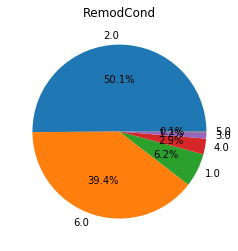

In [18]:
print(train_df.loc[:,'RemodCond'].value_counts())
plt.clf()
plt.pie(train_df.loc[:,'RemodCond'].value_counts().values,
        labels=train_df.loc[:,'RemodCond'].value_counts().index,
        autopct='%1.1f%%')
plt.title('RemodCond')
plt.show()

## 楼层总高度

<Figure size 432x288 with 0 Axes>

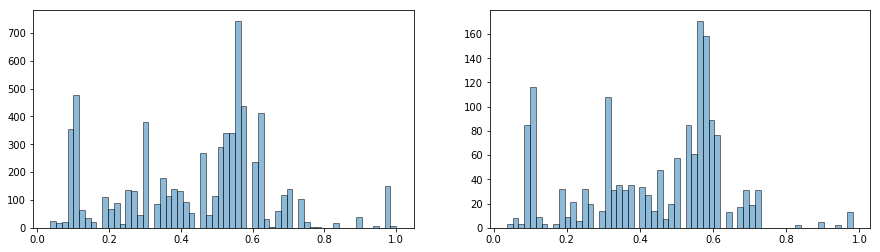

In [172]:
# print(len(train_df.loc[:,'TolHeight'].value_counts()))        # 55种楼层高度

plt.clf()
fig,axs=plt.subplots(1,2,figsize=(15,4))
axs[0].hist(train_df.dropna().loc[:,'TolHeight'],bins=60,edgecolor='black',alpha=0.5)
axs[1].hist(test_df.dropna().loc[:,'TolHeight'],bins=60,edgecolor='black',alpha=0.5)
plt.show()

## 小区出租屋数

<Figure size 432x288 with 0 Axes>

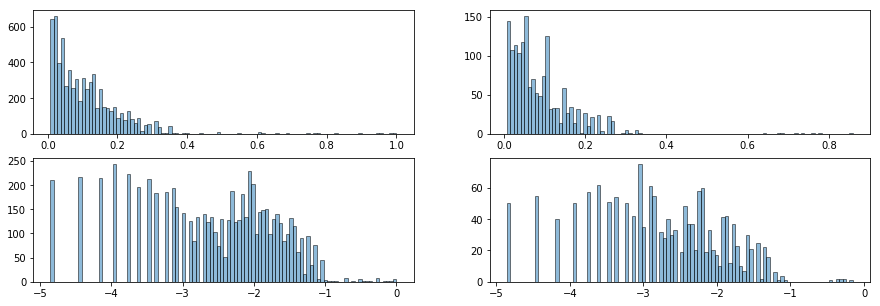

In [164]:
plt.clf()
fig,axs=plt.subplots(2,2,figsize=(15,5))
axs[0,0].hist(train_df.dropna().loc[:,'RentRoom'],bins=100,edgecolor='black',alpha=0.5)
axs[1,0].hist(np.log(train_df.dropna().loc[:,'RentRoom']),bins=100,edgecolor='black',alpha=0.5)
axs[0,1].hist(test_df.dropna().loc[:,'RentRoom'],bins=100,edgecolor='black',alpha=0.5)
axs[1,1].hist(np.log(test_df.dropna().loc[:,'RentRoom']),bins=100,edgecolor='black',alpha=0.5)
plt.show()

## 出租屋面积

<Figure size 432x288 with 0 Axes>

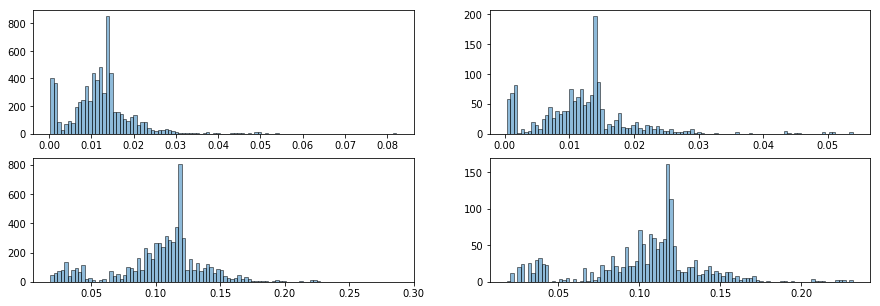

In [163]:
plt.clf()
fig,axs=plt.subplots(2,2,figsize=(15,5))
axs[0,0].hist(train_df.dropna().loc[:,'RoomArea'],bins=100,edgecolor='black',alpha=0.5)
axs[1,0].hist(np.sqrt(train_df.dropna().loc[:,'RoomArea']),bins=100,edgecolor='black',alpha=0.5)
axs[0,1].hist(test_df.dropna().loc[:,'RoomArea'],bins=100,edgecolor='black',alpha=0.5)
axs[1,1].hist(np.sqrt(test_df.dropna().loc[:,'RoomArea']),bins=100,edgecolor='black',alpha=0.5)
plt.show()

## 地铁站距离

<Figure size 432x288 with 0 Axes>

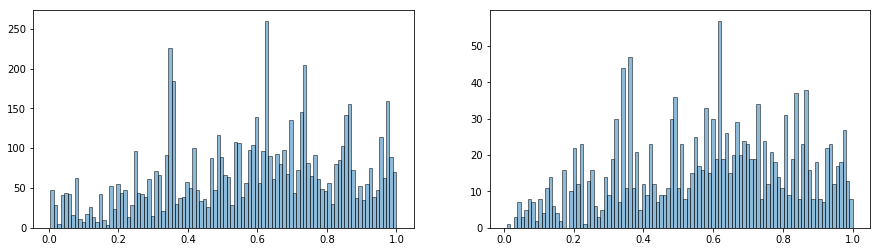

In [162]:
plt.clf()
fig,axs=plt.subplots(1,2,figsize=(15,4))
axs[0].hist(train_df.dropna().loc[:,'SubwayDis'],bins=100,edgecolor='black',alpha=0.5)
axs[1].hist(test_df.dropna().loc[:,'SubwayDis'],bins=100,edgecolor='black',alpha=0.5)
plt.show()

## 租金

<Figure size 432x288 with 0 Axes>

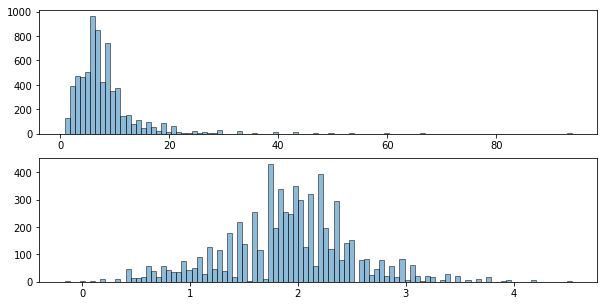

In [158]:
plt.clf()
fig,axs=plt.subplots(2,1,figsize=(10,5))
axs[0].hist(train_df.dropna().loc[:,'Rental'],bins=100,edgecolor='black',alpha=0.5)
axs[1].hist(np.log(train_df.dropna().loc[:,'Rental']),bins=100,edgecolor='black',alpha=0.5)
plt.show()

<Figure size 432x288 with 0 Axes>

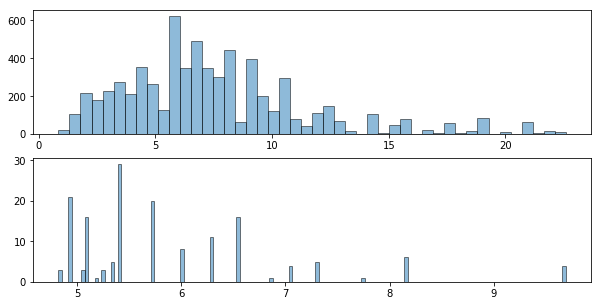

In [219]:
sep=23
plt.clf()
fig,axs=plt.subplots(2,1,figsize=(10,5))
axs[0].hist(train_df[train_df.loc[:,'Rental']<sep].dropna().loc[:,'Rental'],bins=sep*2,edgecolor='black',alpha=0.5)
axs[1].hist(np.sqrt(train_df[train_df.loc[:,'Rental']>sep].dropna().loc[:,'Rental']),bins=(100-sep)*2,edgecolor='black',alpha=0.5)
plt.show()

In [218]:
for i in range(1,101):
    print(i,round(len(train_df[train_df.loc[:,'Rental']<i])/len(train_df),4),end='    ')
    if i%4==0:
        print('')

1 0.005    2 0.0234    3 0.0675    4 0.1632    
5 0.3083    6 0.4292    7 0.5594    8 0.6782    
9 0.776    10 0.8028    11 0.8532    12 0.8805    
13 0.9005    14 0.9101    15 0.9272    16 0.9431    
17 0.9458    18 0.9544    19 0.9565    20 0.9644    
21 0.969    22 0.9701    23 0.974    24 0.9747    
25 0.9772    26 0.9815    27 0.9817    28 0.9833    
29 0.9837    30 0.9858    31 0.9858    32 0.9861    
33 0.989    34 0.9891    35 0.9892    36 0.9892    
37 0.9903    38 0.9904    39 0.9905    40 0.993    
41 0.9931    42 0.9931    43 0.9947    44 0.9947    
45 0.9948    46 0.9948    47 0.9952    48 0.9953    
49 0.9953    50 0.9968    51 0.9968    52 0.9969    
53 0.9969    54 0.9975    55 0.9976    56 0.9976    
57 0.9977    58 0.9978    59 0.9978    60 0.9984    
61 0.9984    62 0.9985    63 0.9985    64 0.9986    
65 0.9986    66 0.9986    67 0.9991    68 0.9992    
69 0.9992    70 0.9992    71 0.9992    72 0.9992    
73 0.9992    74 0.9994    75 0.9994    76 0.9994    
77 0.999

## 统计特征
相当于mean-encoding 


In [ ]:
# train_df.loc[:,['Neighborhood','BusLoc']].drop_duplicates()